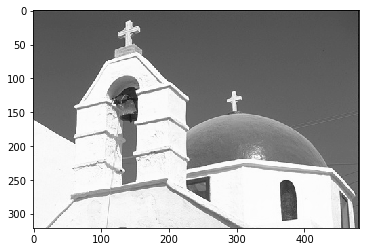

In [2]:
import numpy as np
import imageio as misc
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

"""
   Convert an RGB image to grayscale.

   This function applies a fixed weighting of the color channels to form the
   resulting intensity image.

   Arguments:
      rgb   - a 3D numpy array of shape (sx, sy, 3) storing an RGB image

   Returns:
      gray  - a 2D numpy array of shape (sx, sy) storing the corresponding
              grayscale image
"""
def rgb2gray(rgb):
    gray = np.dot(rgb[...,:3],[0.29894, 0.58704, 0.11402])
    return gray
def load_image(filename):
    image = misc.imread(filename)
    if (image.ndim == 3):
        image = rgb2gray(image)
    return image

##fname = '/home/nian/Desktop/hw1_release/data/143090_noisy.png'
##fname = 'C:/Users/59381/Desktop/hw1_release/data/edge_img/easy/002.jpg/'
fname = 'C:/Users/59381/Desktop/hw1_release/data/edge_img/easy/003.jpg/'
image = load_image(fname)
plt.imshow(image, cmap = 'gray',vmin=0, vmax=255)
plt.show()

In [3]:
def mirror_border(image, wx = 1, wy = 1):
    assert image.ndim == 2, 'image should be grayscale'
    sx, sy = image.shape
   # mirror top/bottom
    top    = image[:wx:,:]
    bottom = image[(sx-wx):,:]
    img = np.concatenate( \
      (top[::-1,:], image, bottom[::-1,:]), \
      axis=0 \
   )
   # mirror left/right
    left  = img[:,:wy]
    right = img[:,(sy-wy):]
    img = np.concatenate( \
      (left[:,::-1], img, right[:,::-1]), \
      axis=1 \
   )
    return img


In [12]:
def pad_border(image, wx = 1, wy = 1):
    assert image.ndim == 2, 'image should be grayscale'
    sx, sy = image.shape
    img = np.zeros((sx+2*wx, sy+2*wy))
    img[wx:(sx+wx),wy:(sy+wy)] = image
    return img
fname = '/home/nian/Desktop/hw1_release/data/143090_noisy.png'

In [6]:
def trim_border(image, wx = 1, wy = 1):
    assert image.ndim == 2, 'image should be grayscale'
    sx, sy = image.shape
    img = np.copy(image[wx:(sx-wx),wy:(sy-wy)])
    return img


In [9]:
def gaussian_1d(sigma = 1.0):
    width = np.ceil(3.0 * sigma)
    x = np.arange(-width, width + 1)
    g = np.exp(-(x * x) / (2 * sigma * sigma))
    g = g / np.sum(g)          # normalize filter to sum to 1 ( equivalent
    g = np.atleast_2d(g)       # to multiplication by 1 / sqrt(2*pi*sigma^2) )
    return g

In [10]:
horizontal_edge = np.ones((5,5))

In [4]:
def conv_2d(image, filt, mode='zero'):
   # make sure that both image and filter are 2D arrays
    assert image.ndim == 2, 'image should be grayscale'
    filt = np.atleast_2d(filt)
    filt = np.flip(filt)
       ##########################################################################
       # TODO: YOUR CODE HERE
    image_h =int(image.shape[0])
    image_w = int(image.shape[1])
    kernel_h = int(filt.shape[0])
    kernel_w =int(filt.shape[1])
    if mode == 'zero':
        image = pad_border(image, wx = kernel_h//2, wy = kernel_w//2)
    if mode == 'mirror':
        image = mirror_border(image, wx = int((kernel_h-1)/2), wy = int((kernel_w-1)/2))
    result = np.zeros((image_h,image_w))
    
    for i in range(image_h):
        for j in range(image_w):
            result[i][j] = np.sum(filt*image[i:i+kernel_h,j:j+kernel_w])
 
    ## raise NotImplementedError('conv_2d')
       ##########################################################################
    return result


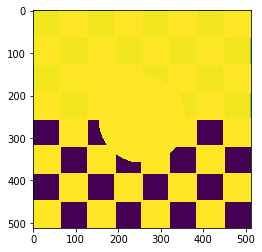

array([[  90.,  120.,  150., ..., 3600., 2880., 2160.],
       [ 120.,  160.,  200., ..., 4800., 3840., 2880.],
       [ 150.,  200.,  250., ..., 6000., 4800., 3600.],
       ...,
       [3450., 4600., 5750., ...,    0.,    0.,    0.],
       [2760., 3680., 4600., ...,    0.,    0.,    0.],
       [2070., 2760., 3450., ...,    0.,    0.,    0.]])

In [57]:
image_conv = conv_2d(image,horizontal_edge,mode='zero')
plt.imshow(image_conv, vmin=0, vmax=255)
plt.show()
image_conv

In [121]:
a = np.array([[1,1],[1,1],[1,1]])
b =  np.array([[2,2],[2,2],[3,3]])

a*b

In [95]:
def denoise_gaussian(image, sigma = 1.0):
   ##########################################################################
   # TODO: YOUR CODE HERE
    sigma = int(sigma)
    x = gaussian_1d(sigma = sigma )
    gaus_2d = x*(x.transpose())
    img = conv_2d(image,gaus_2d,mode = 'mirror')
    
   ##########################################################################
    return img

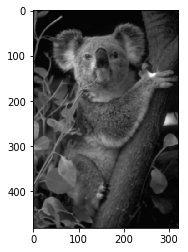

array([[ 4.47281354,  8.96833823, 27.80195973, ...,  8.95473044,
        12.9115216 , 19.43012746],
       [ 4.2496268 ,  9.63782899, 29.75518974, ..., 11.51491252,
        15.93010867, 21.85253805],
       [ 4.36791524, 11.17871336, 33.15252112, ..., 14.49011072,
        17.44465625, 20.44220201],
       ...,
       [58.08611457, 59.29152254, 59.75147689, ...,  5.70665917,
         4.76048928,  4.7170193 ],
       [38.89799789, 42.83212776, 46.07173296, ...,  4.72302303,
         4.65886557,  4.74016072],
       [18.41735502, 22.66086701, 26.68091306, ...,  4.83023661,
         4.77381026,  4.81795361]])

In [47]:
image_2 = denoise_gaussian(image)
plt.imshow(image_2, cmap='gray', vmin=0, vmax=255)
plt.show()
image_2

In [183]:
def denoise_gaussian(image, sigma = 1.0):
   ##########################################################################
   # TODO: YOUR CODE HERE
    x = gaussian_1d(sigma = sigma )
    gaus_2d = x*(x.transpose())
    return gaus_2d
res = denoise_gaussian(image)
res

array([[1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03,
        1.07237757e-03, 2.39279779e-04, 1.96412803e-05],
       [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02,
        1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
       [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02,
        5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
       [1.76805171e-03, 2.15392793e-02, 9.65323526e-02, 1.59154943e-01,
        9.65323526e-02, 2.15392793e-02, 1.76805171e-03],
       [1.07237757e-03, 1.30642333e-02, 5.85498315e-02, 9.65323526e-02,
        5.85498315e-02, 1.30642333e-02, 1.07237757e-03],
       [2.39279779e-04, 2.91502447e-03, 1.30642333e-02, 2.15392793e-02,
        1.30642333e-02, 2.91502447e-03, 2.39279779e-04],
       [1.96412803e-05, 2.39279779e-04, 1.07237757e-03, 1.76805171e-03,
        1.07237757e-03, 2.39279779e-04, 1.96412803e-05]])

In [177]:
x = gaussian_1d(sigma = 1.0)
x*(x.transpose())

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [181]:
def gaussian_1d(sigma = 1.0):
    width = np.ceil(3.0 * sigma)
    x = np.arange(-width, width + 1)
    g = np.exp(-(x**2) / (2 * sigma * sigma))/np.sqrt(2*np.pi*sigma**2)         # normalize filter to sum to 1 ( equivalent
    g = np.atleast_2d(g)       # to multiplication by 1 / sqrt(2*pi*sigma^2) )
    return g
gaussian_1d()plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.show()

array([[0.00443185, 0.05399097, 0.24197072, 0.39894228, 0.24197072,
        0.05399097, 0.00443185]])

In [8]:
def denoise_median(image, width = 1):
   ##########################################################################
    m = 2*width+1
    
    
    image_h =int(image.shape[0])
    image_w = int(image.shape[1])
    result = np.zeros((image_h,image_w))
    
    for j in range(image_w-m+1):
         for i in range(image_h-m+1):
            temp = []
            for x in range(m):
                for y in range(m):
                    temp.append(image[i+x][j+y])
            median = (np.sort(temp))[int(m*m/2)]
            for x in range(m):
                for y in range(m):
                    result[i+x][j+y] = median
    img = result

   ##  raise NotImplementedError('denoise_median')
   ##########################################################################
    return img

In [133]:
def denoise_median(image, width = 1):
   ##########################################################################
    m = 2*width+1
    image_w =int(image.shape[0])
    image_h = int(image.shape[1])
    result = np.zeros((image_w,image_h))
    for i in range(image_w):
         for j in range(image_h):
                if i>(image_w-width):
                ## the right border
                    right = min(i+width,image_w)
                    left = right - m
                elif i < width:
                    ## the left border
                    left = max(i-width,0)
                    right = left + m
                else:
                    left = i-width
                    right = left +m
                    
                if j > (image_h - width):
                    ## the bottom
                    bottom = min(j+width,image_h)
                    top  = bottom - m
                elif j < width:
                    top = max(j-width,0)
                    bottom = top + m
                else:
                    top = j-width
                    bottom = top+m
                
                temp = np.sort(image[left:right,top:bottom].flatten())
                print((i,j))
                print(left,right,top,bottom)
                image[i,j] = temp[(len(temp)//2)]
    
    
    return image

In [2]:
def denoise_median(image, width = 1):
   ##########################################################################
   # TODO: YOUR CODE HERE
   # discuss the boundary condition with Cheng Du
   
    [image_w, image_h] = np.shape(image)
    m = 2*width+1
    img = np.zeros((image_w, image_h))
    for i in range(image_w):
        for j in range(image_h):
            if  i+width>image_w:
                right = min(i+width, image_w)
                left = right-m
            elif i-width<0:
                left = max(i-width, 0)
                right = left+m
            else:
                left = i-width
                right = left+m
            if  j+width>image_h:
                bottom = min(j+width, image_h)
                top = bottom-m
            elif j-width <0:
                top = max(j-width, 0)
                bottom = top+m
            else:
                top = j-width
                bottom = top+m
        
            window = np.sort(image[left:right, top:bottom].flatten())
            img[i, j]= window[int(np.floor(len(window)/2))]
        
        
    return img

In [3]:
result = denoise_median(image, width = 1)

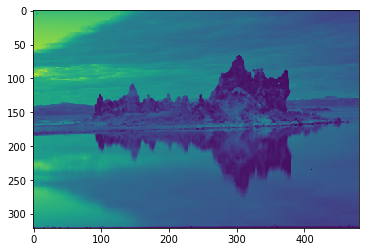

In [4]:
plt.imshow(result, vmin=0, vmax=255)
plt.show()

In [381]:
(image[318:321,478:481])

Array([[ 0.     , 23.9259 , 23.15394],
       [ 7.11242,  6.81348,  7.11242],
       [11.27116,  0.     , 11.15714]])

In [386]:
image[319][480]

7.11242

In [11]:
def sobel_gradients(image):
   ##########################################################################
   # TODO: YOUR CODE HERE
    dx_filter = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
    dy_filter = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
    
    dx = conv_2d(image,dx_filter, mode='mirror')
    dy = conv_2d(image,dy_filter,mode='mirror')
   ##########################################################################

    return dx, dy



In [68]:
sobel = sobel_gradients(image)[0]
from PIL import Image
Img = Image.fromarray(sobel)
Img.show()

In [12]:
def direction(image):
    x,y = sobel_gradients(image)
    mag = np.sqrt(x**2+y**2)
    direction = (180*np.arctan2(y,x))/math.pi+180
    return direction,mag

def nonmax_suppress(mag, theta):
   ##########################################################################
   # TODO: YOUR CODE HERE
    m = len(mag)
    n = len(mag[1])
    mask = mag
    for i in range(1,m-1):
        for j in range(1,n-1):
            angle = theta[i][j]
    ## vertical
            if (angle>67.5 and angle<=112.5) or (angle>=247.5 and angle<=292.5): 
                if (mag[i-1][j])> mag[i][j] or (mag[i+1][j]> mag[i][j]):
                    mask[i][j]=0

    ## horizontal
            elif (angle>340 and angle<=22.5) or (angle>157.5 and angle<=202.5): 
                if ((mag[i][j+1])>mag[i][j] or (mag[i][j-1]> mag[i][j])):
                    mask[i][j]=0

    ## 45
            elif (angle>22.5 and angle<=67.5) or (angle > 202.5 and angle<247.5): 
                if (mag[i-1][j-1]>mag[i][j] or (mag[i+1][j+1]> mag[i][j])):
                    mask[i][j]=0

    ## 135
            else:
                if ((mag[i-1][j+1])>mag[i][j] or (mag[i+1][j-1]> mag[i][j])):
                    
                    mask[i][j]=0

    nonmax = mask
   ##########################################################################
    return nonmax

In [13]:
import math
theta,mag = direction(image)

nonmax = nonmax_suppress(mag,theta)

In [16]:
from PIL import Image
Img = Image.fromarray(nonmax)
Img.show()

To track theses edges, we
   investigate the 8 neighbours of strong edges.  Once we find the weak edges,
   located along strong edges' gradient direction, we will mark them as strong
   edges.  You can adopt the same gradient checking strategy used in nonmaximum
   suppression.  This process repeats util we check all strong edges.

   In practice, we use a queue to implement edge linking.  In python, we could
   use a list and its fuction .append or .pop to enqueue or dequeue.
   
   
   
   
   
   1. first compute the low threshold and high threshold so that any pixel below
   low threshold will be thrown away, and any pixel above high threshold is
   a strong edge and will be preserved in the final edge map.
   
   
   2. The pixels that
   fall in-between are considered as weak edges.  We then add weak edges to
   true edges if they connect to a strong edge along the gradient direction.
   
   
   
   
   


In [32]:
def threshold(image, lowRatio=0.01, highRatio=0.05,weak = 25,strong= 250):
    high = image.max() * highRatio;
    low = high*lowRatio;
    m, n = image.shape
    threshold = np.zeros((m,n),dtype = float)
    s_i, s_j = np.where(image >= high)
    w_i, w_j = np.where((image <= high) & (image >= low))
    threshold[s_i, s_j] = strong
    threshold[w_i, w_j] = weak
    
    return threshold,weak,strong

In [18]:
thre = threshold(nonmax)[0]

In [19]:
thre

array([[ 25.,  25.,  25., ...,  25.,  25.,  25.],
       [255., 255., 255., ..., 255., 255.,  25.],
       [ 25.,   0.,   0., ...,   0., 255., 255.],
       ...,
       [  0.,   0.,   0., ...,   0., 255., 255.],
       [  0.,   0.,   0., ...,   0., 255., 255.],
       [  0.,   0.,   0., ...,   0., 255., 255.]])

In [20]:
Img = Image.fromarray(thre)
Img.show()

In [14]:
## recursion
def threshold(image, lowRatio=0.05, highRatio=0.2,weak = 25,strong= 255):
    high = image.max() * highRatio;
    low = high*lowRatio;
    m, n = image.shape
    threshold = np.zeros((m,n),dtype = float)
    s_i, s_j = np.where(image >= high)
    w_i, w_j = np.where((image <= high) & (image >= low))
    threshold[s_i, s_j] = strong
    threshold[w_i, w_j] = weak
    return threshold,weak,strong

def findweakedges(angle,threshold,direction,i,j,strong,weak):
    threshold[i][j] = strong
    row,col = threshold.shape
    if (i == 0 or i ==(row-1) or j==0 or j==(col-1)):
        return threshold
    if (angle>67.5 and angle<=112.5) and threshold[i-1][j] ==weak:
        findweakedges(angle,threshold,direction,i-1,j,strong,weak)
    if (angle>=247.5 and angle<=292.5) and threshold[i+1][j] ==weak and (i+1)<row:
        findweakedges(angle,threshold,direction,i+1,j,strong,weak)
    if (angle>= 340 and angle<=22.5) and threshold[i][j-1] ==weak:
        findweakedges(angle,threshold,direction,i,j-1,strong,weak)
    if (angle>= 157.5 and angle<=202.5) and threshold[i][j+1] ==weak and (j+1)<col:
        findweakedges(angle,threshold,direction,i,j+1,strong,weak)
    if (angle> 22.5 and angle<=67.5) and threshold[i-1][j+1] ==weak and (j+1)<col:
        findweakedges(angle,threshold,direction,i-1,j+1,strong,weak)
    if (angle> 202.5 and angle<=247.5) and threshold[i+1][j-1] ==weak and (i+1)<row:
        findweakedges(angle,threshold,direction,i+1,j-1,strong,weak)
    if (angle>= 112.5 and angle<=157.5) and threshold[i-1][j-1] ==weak:
        findweakedges(angle,threshold,direction,i-1,j-1,strong,weak)
    if (angle> 22.5 and angle<=67.5) and threshold[i+1][j+1] ==weak and (j+1)<col and (i+1)<row:
        findweakedges(angle,threshold,direction,i+1,j+1,strong,weak)
    else:
        return threshold

def hysteresis_edge_linking(nonmax, theta):
    ##########################################################################
    # TODO: YOUR CODE HERE
    row,col = nonmax.shape
    threshold1,weak,strong = threshold(nonmax)
    test = threshold1.copy()
    for i in range(1,row-1):
        for j in range(1,col-1):
            angle = theta[i][j]
            if threshold1[i][j] == strong:
                edge1 = findweakedges(angle,threshold1,direction,i,j,strong,weak)
    edge1[edge1>=strong] = strong
    edge1[edge1 < strong] = 0
    return edge1

In [15]:
hys = hysteresis_edge_linking(nonmax, theta)
Img = Image.fromarray(hys)
Img.show()

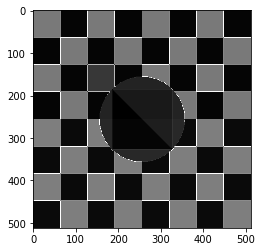

In [92]:
test = hys - image
plt.imshow(test,cmap='gray')
plt.show()

In [22]:
def canny(image):
   ##########################################################################
   # TODO: YOUR CODE HERE
   ## raise NotImplementedError('canny')
   ##########################################################################
# see the direction function:(1) Compute gradients in x- and y-directions at every location using the
#  Sobel operator.  See sobel_gradients() above.
# (2) Estimate edge strength (gradient magnitude) and direction.  
    theta,mag = direction(image)
    
# (3) Perform nonmaximum suppression of the edge strength map, thinning it
# in the direction perpendicular to that of a local edge.
    nonmax = nonmax_suppress(mag,theta)
    
# (4) Compute the high threshold and low threshold of edge strength map
#  to classify the pixels as strong edges, weak edges and non edges.
#  Then link weak edges to strong edges
    edge = hysteresis_edge_linking(nonmax, theta)
    return mag, nonmax, edge

In [25]:
res = canny(image)[2]
Img = Image.fromarray(res)
Img.show()

In [27]:
def bilateral_filter(res,image,filter_width,x,y,sigma_s,sigma_r):
    temp= Wp= 0
    m = 2*filter_width + 1
    for i in range(filter_width,m):
        for j in range(filter_width,m):
            x_left = x+i-filter_width
            y_left = y+j-filter_width          
            if x_left >= len(image):
                x_left = len(image)-1
            if y_left>= len(image[0]):
                y_left = len(image[0])-1
            gi = gaussian(image[x_left][y_left] - image[x][y], sigma_r)
            gs = gaussian((np.sqrt((x_left-x)**2+(y_left-y)**2)), sigma_s)
            temp += image[x_left][y_left] * gi * gs
            Wp += gi * gs
    res[x][y] = temp / Wp

In [26]:
def denoise_bilateral(image, sigma_s=1, sigma_r=25.5):
    assert image.ndim == 2, 'image should be grayscale'
    ##########################################################################
    # TODO: YOUR CODE HERE
    img = np.zeros(image.shape)
    filter_width = int(np.ceil(3.0 * sigma_s))
    for i in range(len(image)):
        for j in range(len(image[0])):
            bilateral_filter(img,image,filter_width,i,j,sigma_s,sigma_r)
    ##########################################################################
    return img


def gaussian(x, sigma):
    return (1.0 / (2 * math.pi * (sigma ** 2))) * math.exp(- (x ** 2) / (2 * sigma ** 2))

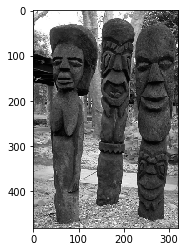

In [28]:
res = denoise_bilateral(image, sigma_s=1, sigma_r=25.5)
plt.imshow(res,cmap='gray')
plt.show()

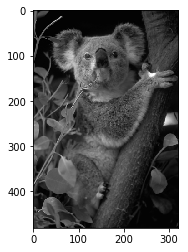

In [104]:
plt.imshow(res,cmap='gray')
plt.show()

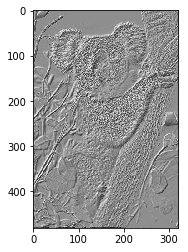

In [105]:
test = (res - image)

plt.imshow(test,cmap='gray')
plt.show()

In [ ]:
image.shape